In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
%matplotlib inline


In [2]:
a=pd.read_csv('train.csv')
b=pd.read_csv('campaign_data.csv')
c=pd.read_csv('customer_demographics.csv')
d=pd.read_csv('coupon_item_mapping.csv')
e=pd.read_csv('customer_transaction_data.csv')
f=pd.read_csv('item_data.csv')
e=e[0:50000]

In [3]:
m1=pd.merge(a,b,on='campaign_id')
m2=pd.merge(m1,c,on='customer_id')
m3=pd.merge(m2,d,on='coupon_id')
m4=pd.merge(m3,f,on='item_id')
m4.dropna(inplace=True)
m5=pd.merge(m4,e,on='item_id')
m5.info()
m5.to_csv('resultant_dataset.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782719 entries, 0 to 782718
Data columns (total 24 columns):
id                   782719 non-null int64
campaign_id          782719 non-null int64
coupon_id            782719 non-null int64
customer_id_x        782719 non-null int64
redemption_status    782719 non-null int64
campaign_type        782719 non-null object
start_date           782719 non-null object
end_date             782719 non-null object
age_range            782719 non-null object
marital_status       782719 non-null object
rented               782719 non-null int64
family_size          782719 non-null object
no_of_children       782719 non-null object
income_bracket       782719 non-null int64
item_id              782719 non-null int64
brand                782719 non-null int64
brand_type           782719 non-null object
category             782719 non-null object
date                 782719 non-null object
customer_id_y        782719 non-null int64
quantity           

###analysis

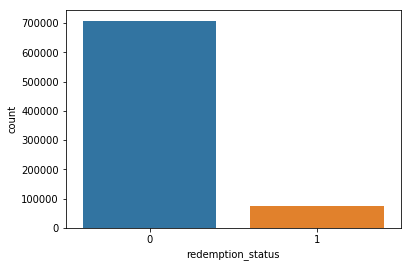

In [110]:
sns.countplot(x='redemption_status',data=m5)

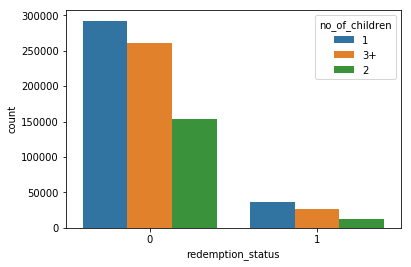

In [4]:
sns.countplot(x='redemption_status',hue='no_of_children',data=m5)

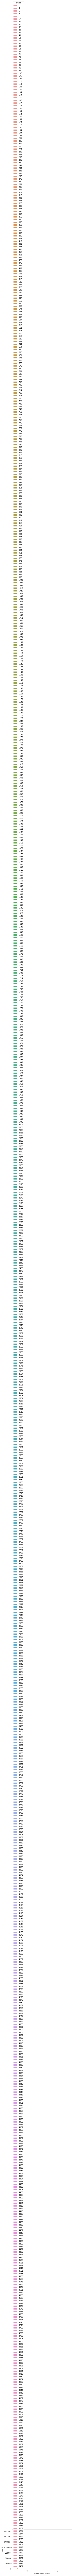

In [112]:
sns.countplot(x='redemption_status',hue='brand',data=m5)

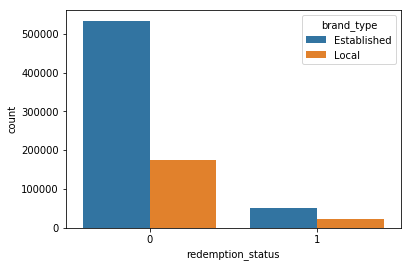

In [113]:
sns.countplot(x='redemption_status',hue='brand_type',data=m5)

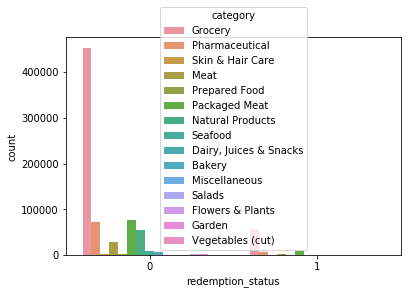

In [114]:
sns.countplot(x='redemption_status',hue='category',data=m5)

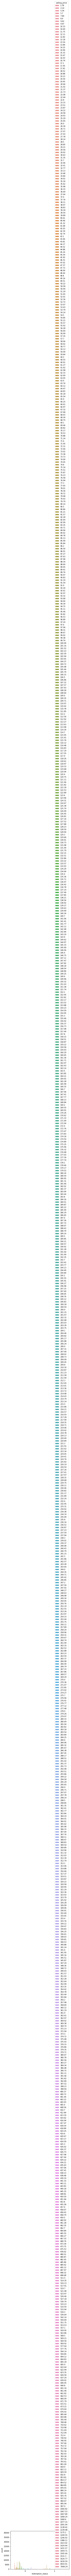

In [115]:
sns.countplot(x='redemption_status',hue='selling_price',data=m5)

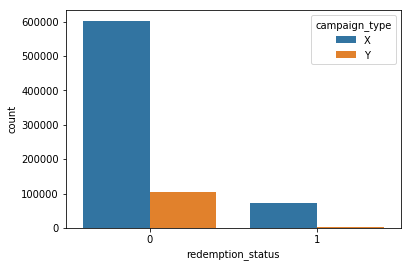

In [116]:
sns.countplot(x='redemption_status',hue='campaign_type',data=m5)

In [117]:
m5.isnull()

,id,campaign_id,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category,date,customer_id_y,quantity,selling_price,other_discount,coupon_discount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [118]:
m5.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id_x        0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
item_id              0
brand                0
brand_type           0
category             0
date                 0
customer_id_y        0
quantity             0
selling_price        0
other_discount       0
coupon_discount      0
dtype: int64

##### data wrangling

In [119]:
m5.head(10)

,id,campaign_id,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category,date,customer_id_y,quantity,selling_price,other_discount,coupon_discount
0,38206,13,27,888,0,X,19/05/13,05/07/13,26-35,Married,0,3,1,4,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
1,1958,13,27,1240,0,X,19/05/13,05/07/13,26-35,Married,0,5+,3+,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
2,4494,13,27,1093,0,X,19/05/13,05/07/13,46-55,Married,0,4,2,6,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
3,66745,13,27,921,0,X,19/05/13,05/07/13,36-45,Married,0,4,2,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
4,111151,13,27,712,0,X,19/05/13,05/07/13,46-55,Married,0,3,1,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
5,61215,13,27,189,0,X,19/05/13,05/07/13,26-35,Married,0,4,2,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
6,20901,13,27,1321,0,X,19/05/13,05/07/13,36-45,Married,0,3,1,1,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
7,124882,13,27,1534,1,X,19/05/13,05/07/13,36-45,Married,0,3,1,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
8,65730,13,27,1131,0,X,19/05/13,05/07/13,18-25,Single,1,5+,3+,1,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
9,31335,13,27,1063,0,X,19/05/13,05/07/13,26-35,Married,0,3,1,4,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0


In [4]:
y=pd.get_dummies(m5['campaign_type'],drop_first=True)

In [5]:
y.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [6]:
a_r=pd.get_dummies(m5['age_range'],drop_first=True)

In [7]:
a_r.head()

,26-35,36-45,46-55,56-70,70+
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [8]:
single=pd.get_dummies(m5['marital_status'],drop_first=True)

In [9]:
single.head()

,Single
0,0
1,0
2,0
3,0
4,0


In [10]:
local_brand=pd.get_dummies(m5['brand_type'],drop_first=True)

In [11]:
local_brand.head()

,Local
0,0
1,0
2,0
3,0
4,0


In [12]:
pd.set_option('display.max_columns', None) #for displaying every column

In [13]:
m5.head()

,id,campaign_id,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category,date,customer_id_y,quantity,selling_price,other_discount,coupon_discount
0,38206,13,27,888,0,X,19/05/13,05/07/13,26-35,Married,0,3,1,4,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
1,1958,13,27,1240,0,X,19/05/13,05/07/13,26-35,Married,0,5+,3+,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
2,4494,13,27,1093,0,X,19/05/13,05/07/13,46-55,Married,0,4,2,6,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
3,66745,13,27,921,0,X,19/05/13,05/07/13,36-45,Married,0,4,2,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0
4,111151,13,27,712,0,X,19/05/13,05/07/13,46-55,Married,0,3,1,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0


In [14]:
on_rent=pd.get_dummies(m5['rented'],drop_first=True)

In [15]:
on_rent.head()

,1
0,0
1,0
2,0
3,0
4,0


In [16]:
fam_size=pd.get_dummies(m5['family_size'],drop_first=True)

In [17]:
fam_size.head(10)

,3,4,5+
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
5,0,1,0
6,1,0,0
7,1,0,0
8,0,0,1
9,1,0,0


In [18]:
Cat=pd.get_dummies(m5['category'])

In [19]:
Cat.sum()

Bakery                       498
Dairy, Juices & Snacks      6813
Flowers & Plants            2109
Garden                      1755
Grocery                   509789
Meat                       30813
Miscellaneous                308
Natural Products           54684
Packaged Meat              84652
Pharmaceutical             77476
Prepared Food               1546
Salads                       458
Seafood                     8307
Skin & Hair Care            3403
Vegetables (cut)             108
dtype: int64

In [20]:
children=pd.get_dummies(m5['no_of_children'],drop_first=True)

In [21]:
m5=pd.concat([m5,y,a_r,single,local_brand,on_rent,fam_size,Cat,children],axis=1)
m5.head()

,id,campaign_id,coupon_id,customer_id_x,redemption_status,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category,date,customer_id_y,quantity,selling_price,other_discount,coupon_discount,Y,26-35,36-45,46-55,56-70,70+,Single,Local,1,3,4,5+,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Vegetables (cut),2,3+
0,38206,13,27,888,0,X,19/05/13,05/07/13,26-35,Married,0,3,1,4,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1958,13,27,1240,0,X,19/05/13,05/07/13,26-35,Married,0,5+,3+,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,4494,13,27,1093,0,X,19/05/13,05/07/13,46-55,Married,0,4,2,6,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,66745,13,27,921,0,X,19/05/13,05/07/13,36-45,Married,0,4,2,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,111151,13,27,712,0,X,19/05/13,05/07/13,46-55,Married,0,3,1,5,24775,1636,Established,Grocery,2012-02-26,843,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
m5.drop(['id','campaign_type','age_range','marital_status','rented','brand_type','family_size','date','customer_id_x','customer_id_y','no_of_children'],axis=1,inplace=True)

In [23]:
m5.head()

,campaign_id,coupon_id,redemption_status,start_date,end_date,income_bracket,item_id,brand,category,quantity,selling_price,other_discount,coupon_discount,Y,26-35,36-45,46-55,56-70,70+,Single,Local,1,3,4,5+,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Vegetables (cut),2,3+
0,13,27,0,19/05/13,05/07/13,4,24775,1636,Grocery,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,13,27,0,19/05/13,05/07/13,5,24775,1636,Grocery,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,13,27,0,19/05/13,05/07/13,6,24775,1636,Grocery,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,13,27,0,19/05/13,05/07/13,5,24775,1636,Grocery,1,65.54,-65.9,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13,27,0,19/05/13,05/07/13,5,24775,1636,Grocery,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
m5.drop(['start_date','end_date'],axis=1,inplace=True)

In [25]:
m5.head()

,campaign_id,coupon_id,redemption_status,income_bracket,item_id,brand,category,quantity,selling_price,other_discount,coupon_discount,Y,26-35,36-45,46-55,56-70,70+,Single,Local,1,3,4,5+,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Vegetables (cut),2,3+
0,13,27,0,4,24775,1636,Grocery,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,13,27,0,5,24775,1636,Grocery,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,13,27,0,6,24775,1636,Grocery,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,13,27,0,5,24775,1636,Grocery,1,65.54,-65.9,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13,27,0,5,24775,1636,Grocery,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
m5.drop(['category'],axis=1,inplace=True)
m5.head()

,campaign_id,coupon_id,redemption_status,income_bracket,item_id,brand,quantity,selling_price,other_discount,coupon_discount,Y,26-35,36-45,46-55,56-70,70+,Single,Local,1,3,4,5+,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Vegetables (cut),2,3+
0,13,27,0,4,24775,1636,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,13,27,0,5,24775,1636,1,65.54,-65.9,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,13,27,0,6,24775,1636,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,13,27,0,5,24775,1636,1,65.54,-65.9,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13,27,0,5,24775,1636,1,65.54,-65.9,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### training and testing

In [27]:
y=m5['redemption_status']
x=m5.drop('redemption_status',axis=1)

In [28]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)

In [29]:
clf=LogisticRegression(class_weight='balanced',random_state=42,multi_class='auto')
clf.fit(x_train,y_train)

D:\pyt\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [30]:
pre=clf.predict(x_test)
acc=accuracy_score(pre,y_test)
print(acc)

0.6886626124284546


In [31]:
confusion_matrix(y_test,pre)

array([[95290, 46280],
       [ 2458, 12516]], dtype=int64)

In [32]:
roc_auc_score(y_test,pre)

0.7544716933900609